In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [19]:
# 20 News Groups Dataset
news = datasets.fetch_20newsgroups()

news.data[:5]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [4]:
news.target_names # 20개의 그룹

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
news.target[:5] # 0 ~ 19

array([ 7,  4,  4,  1, 14])

In [6]:
# 벡터화
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(news.data)

vectors

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [7]:
# 벡터화 확인
vectors[0].data

array([0.13157119, 0.04278499, 0.03770449, 0.09353931, 0.09785516,
       0.05511105, 0.05989857, 0.05545703, 0.0690878 , 0.1558717 ,
       0.02921528, 0.05922294, 0.07313444, 0.08207027, 0.03188937,
       0.08342748, 0.06339409, 0.10826904, 0.0606221 , 0.10844725,
       0.09714744, 0.07000411, 0.08844382, 0.17691751, 0.0343176 ,
       0.04280825, 0.03709893, 0.0871642 , 0.08171219, 0.09869735,
       0.13280753, 0.08646963, 0.0953487 , 0.02245166, 0.07526016,
       0.05666562, 0.04943756, 0.11603643, 0.16713176, 0.0690878 ,
       0.13874908, 0.0845253 , 0.14155753, 0.09219024, 0.02991186,
       0.04247263, 0.09036441, 0.10809248, 0.10015015, 0.05097865,
       0.06621689, 0.0454964 , 0.12287763, 0.0846283 , 0.05715821,
       0.03955173, 0.13412921, 0.04951999, 0.03671831, 0.04114286,
       0.10278592, 0.06363421, 0.0888257 , 0.14534719, 0.06332604,
       0.01921946, 0.09913274, 0.07801368, 0.10936401, 0.06521174,
       0.03708598, 0.01992886, 0.16068606, 0.03542092, 0.03447

In [8]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(vectors, news.target, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8485, 130107) (8485,)
(2829, 130107) (2829,)


In [9]:
# 학습
model = MultinomialNB(alpha=0.01)

model.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [10]:
# 모델 정확도
model.score(x_test, y_test)

0.9059738423471191

In [11]:
# Spam Ham Dataset // https://www.kaggle.com/venky73/spam-mails-dataset

import pandas as pd

df = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/spam_ham_dataset.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


<Axes: xlabel='label_num', ylabel='count'>

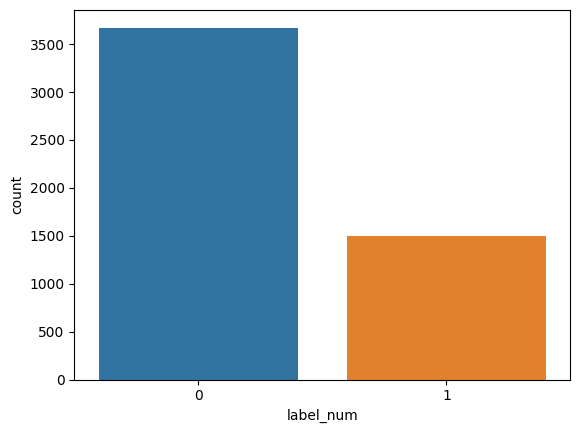

In [17]:
sns.countplot(x = df['label_num'])

In [12]:
# 벡터화
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(df.text)

vectors

<5171x50447 sparse matrix of type '<class 'numpy.float64'>'
	with 456145 stored elements in Compressed Sparse Row format>

In [13]:
# 학습
x_train, x_test, y_train, y_test = train_test_split(vectors, df.label_num, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3878, 50447) (3878,)
(1293, 50447) (1293,)


In [14]:
# 모델 정의
model = MultinomialNB(alpha=0.1)

model.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [15]:
# 모델 정확도
model.score(x_test, y_test)

0.9868522815158546